## 17.8 Breadth- and depth-first search

We saw two kinds of [traversals for rooted trees](../16_Trees/16_3_traversals.ipynb#16.3-Traversals).
A breadth-first search (BFS) proceeds from the root downwards,
level by level: it first visits the root, then its children,
then their children, and so on.
A depth-first search (DFS) goes down each subtree as far as it can before exploring the next one.

We can traverse graphs in similar ways.
Since a traversal finds all nodes reachable from a given node, traversals can also be seen as searches.

Let's first get the usual preamble out of the way.

In [1]:
%run -i ../m269_digraph
%run -i ../m269_ungraph
%run -i ../m269_graphs

### 17.8.1 Breadth-first search

Our traversal algorithm puts the unprocessed edges in a set and
picks one of them to visit the next node.
The traversal is a rambling walk that visits nodes in no particular order.

However, a BFS traverses a graph in a very specific order:
it visits first the start node, then its out-neighbours,
then their out-neighbours, and so on.
To ensure this, we simply process the edges in the order they're found.
The collection of unprocessed edges must be a first-in, first-out sequence.
The BFS algorithm is our traversal algorithm with a small change:
we use a queue of unprocessed edges instead of a set.

Like sets, queues can support the addition and removal of items in
constant time, so the complexity remains unchanged.

To write the code, I copy the `traversed` function, import our implementation of queues,
and make small changes to the five lines involving the variable `unprocessed`.

In [2]:
%run -i ../m269_queue.py

In [3]:
# this code is also in m269_digraph.py

def bfs(graph: DiGraph, start: Hashable) -> DiGraph:
    """Return the subgraph traversed by a breadth-first search.

    Preconditions: graph.has_node(start)
    """
    # changes from traversed function noted in comments
    visited = DiGraph()
    visited.add_node(start)
    unprocessed = Queue()                                   # was set
    for neighbour in graph.out_neighbours(start):
        unprocessed.enqueue( (start, neighbour) )           # was add()
    while unprocessed.size() > 0:                           # was len()
        edge = unprocessed.dequeue()                        # was pop()
        previous = edge[0]
        current = edge[1]
        if not visited.has_node(current):
            visited.add_node(current)
            visited.add_edge(previous, current)
            for neighbour in graph.out_neighbours(current):
                unprocessed.enqueue( (current, neighbour) ) # was add()
    return visited

### 17.8.2 Depth-first search

A depth-first search first visits a node A, then one of A's out-neighbours,
let's call it B, then one of B's out-neighbours, and so on.
To obtain this behaviour, after adding the outgoing edges of a visited node,
we must follow one of them. It is simplest to follow the last added edge.
The collection of unprocessed edges must be a last-in, first-out sequence.
So, by changing the traversal algorithm to use a stack of unprocessed edges
instead of a set, we obtain the DFS algorithm.

In [4]:
%run -i ../m269_stack

Like for sets, adding and removing items from a stack takes constant time,
so again the complexity isn't affected.

<div class="alert alert-warning">
<strong>Note:</strong> A breadth- or depth-first search of a graph has worst-case complexity
Θ(<em>n</em> + <em>e</em>).
</div>

The code is the same as for `bfs`, but with `unprocessed` being a stack
rather than a queue.

In [5]:
# this code is also in m269_digraph.py

def dfs(graph: DiGraph, start: Hashable) -> DiGraph:
    """Return the subgraph traversed by a depth-first search.

    Preconditions: graph.has_node(start)
    """
    visited = DiGraph()
    visited.add_node(start)
    unprocessed = Stack()                                   # was Queue()
    for neighbour in graph.out_neighbours(start):
        unprocessed.push( (start, neighbour) )              # was enqueue()
    while unprocessed.size() > 0:
        edge = unprocessed.pop()                            # was dequeue()
        previous = edge[0]
        current = edge[1]
        if not visited.has_node(current):
            visited.add_node(current)
            visited.add_edge(previous, current)
            for neighbour in graph.out_neighbours(current):
                unprocessed.push( (current, neighbour) )    # was enqueue()
    return visited

### 17.8.3 Tests

Let's compare the subgraphs generated by BFS and DFS when traversing
the same input graph from the same start node.

First, a null graph with multiple nodes.
BFS and DFS generate the same graph, just with the start node, because there are no edges to follow.

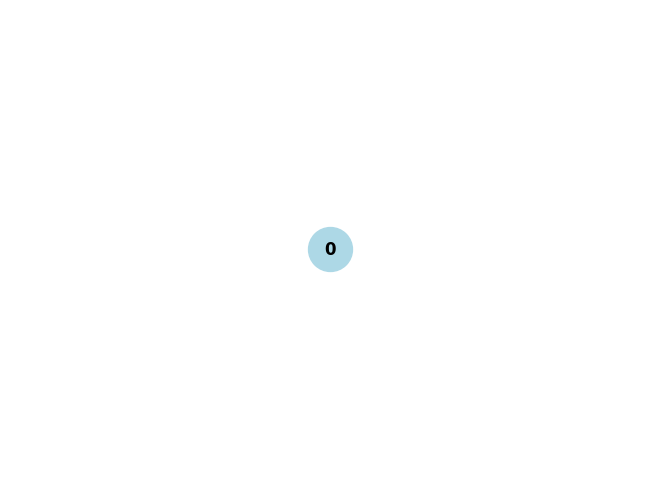

In [6]:
bfs(null_graph(3), 0).draw()        # nodes: 0, 1, 2; start node: 0

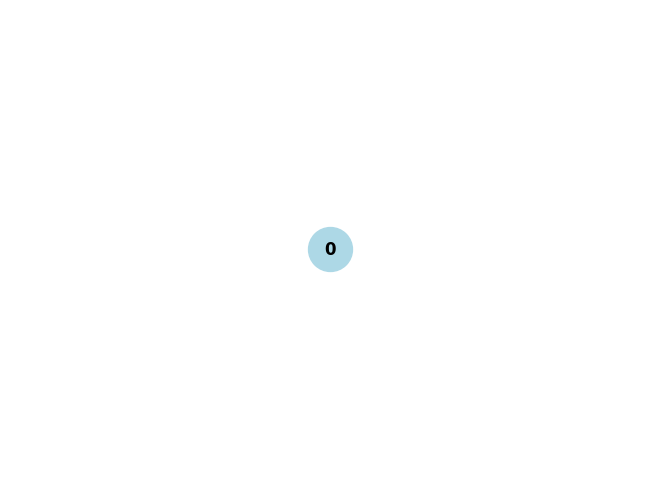

In [7]:
dfs(null_graph(3), 0).draw()

BFS and DFS also traverse path graphs in the same way,
as there's no choice of which edges to follow.

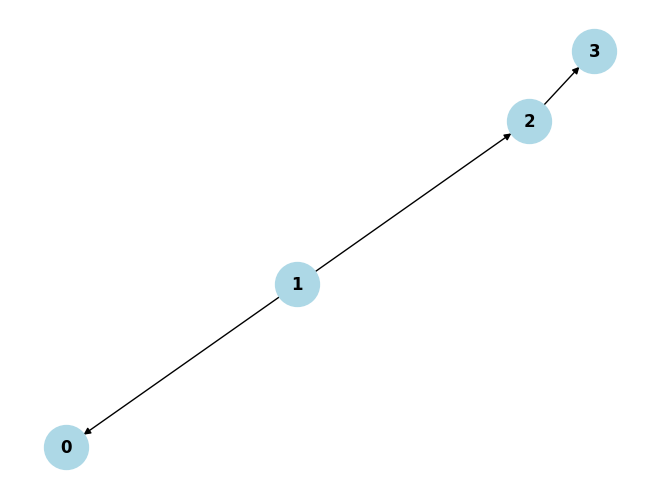

In [8]:
bfs(path_graph(4), 1).draw()        # start node: 1

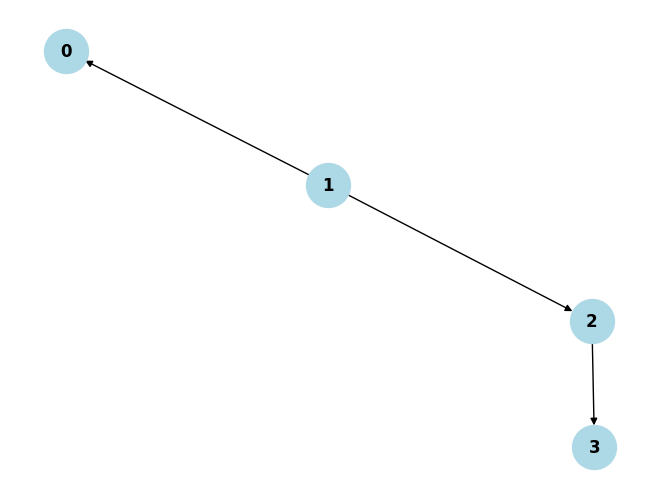

In [9]:
dfs(path_graph(4), 1).draw()

However, for complete graphs, the outputs differ.
BFS generates a star-shaped graph
because all other nodes are out-neighbours of the start node.
DFS generates a directed path graph, because there's always an
edge that can be followed from any current node to any yet-unvisited node.

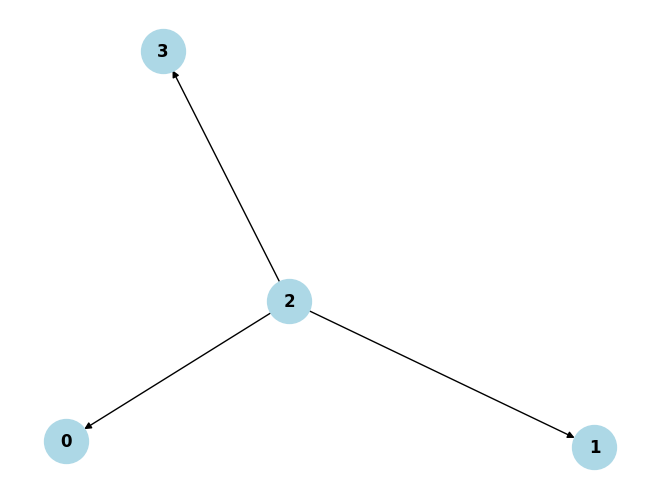

In [10]:
bfs(complete_graph(4), 2).draw()    # start node: 2

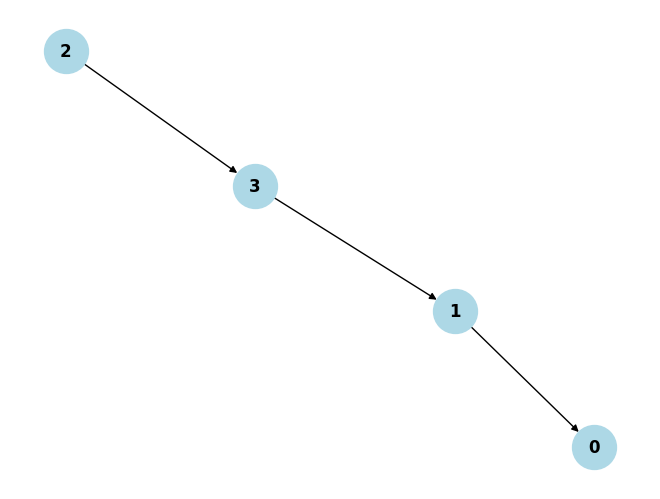

In [11]:
dfs(complete_graph(4), 2).draw()

For random graphs, the BFS and DFS traversals may be different or the same,
as you can observe by executing the following cells several times.
I set the edge probability to 40% but you can change it.
As the probability increases from 0% (null graph) to 100% (complete graph),
the BFS and DFS traversals are less likely to be the same:
the traversals are always equal for null graphs and
always different for complete graphs, no matter the start node.

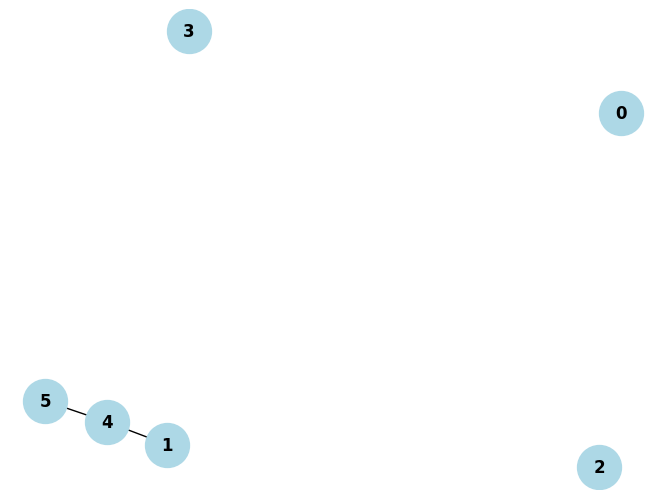

In [12]:
random = random_graph(6, 0.4)   # set a lower or higher probability
random.draw()

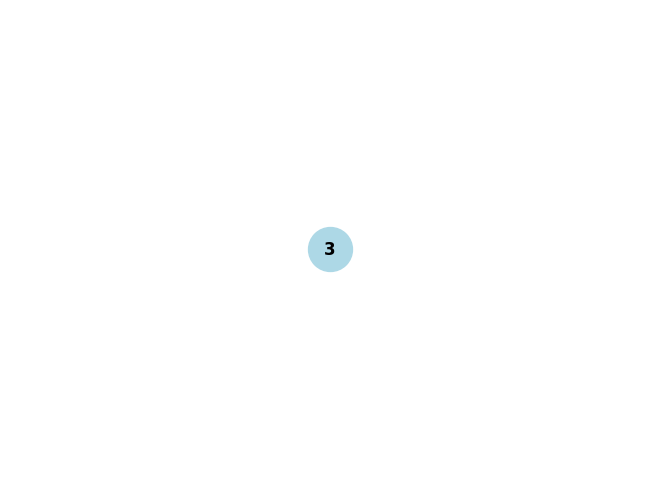

In [13]:
bfs(random, 3).draw()           # start node: 3

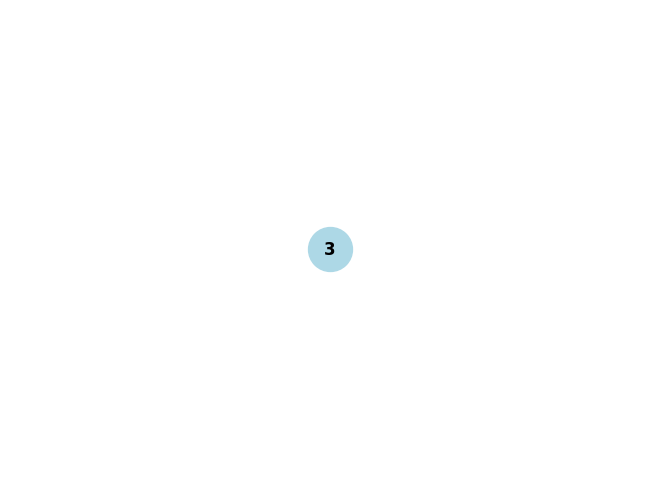

In [14]:
dfs(random, 3).draw()

### 17.8.4 Comparison

Like the basic 'walk' traversal,
BFS and DFS produce a directed tree of the nodes reachable from the start.
The three algorithms traverse an acyclic subgraph of the input graph and thus
any of them can be used to decide if the input graph is connected or is a tree.

<div class="alert alert-warning">
<strong>Note:</strong> If a graph problem is about connectivity, you can probably solve it with
any traversal algorithm.
</div>

However, the difference between DFS and BFS leads to one advantage of BFS.
DFS extends one path as far as it can.
When that path leads to no unvisited nodes, it tries a different path.
BFS instead extends different paths from the start node one edge at a time,
because it first visits the start node's out-neighbours,
then their out-neighbours, and so on. In other words, BFS first finds
the nodes one edge away from the start, then those two edges away, etc.

<div class="alert alert-warning">
<strong>Note:</strong> BFS finds the shortest paths from the start node to every other reachable node.
</div>

There may be several BFS and DFS subgraphs for the same graph and start node,
but the `bfs` and `dfs` functions only produce one of them.
Which one is produced depends on the order in which nodes are stored
internally in the sets of neighbours.

For example, a complete graph with *n* nodes has
(*n* – 1)! DFS subgraphs from each start node.
After the start node, DFS can visit any of the *n* – 1 other nodes,
then any of the *n* – 2 remaining nodes, and so on.
The above 4-node complete graph has (4 – 1)! = 6 DFS subgraphs from
start node 0: 0 $\rightarrow$ 1 $\rightarrow$ 2 $\rightarrow$ 3,
0 $\rightarrow$ 1 $\rightarrow$ 3 $\rightarrow$ 2 and
every other directed path graph obtained by permutation of nodes 1, 2 and 3.

However, there's a single BFS subgraph for a complete graph and start node:
as seen earlier, it's in the form of a star, with the start node in the centre.

The simplest example of a graph with two BFS subgraphs is the following:

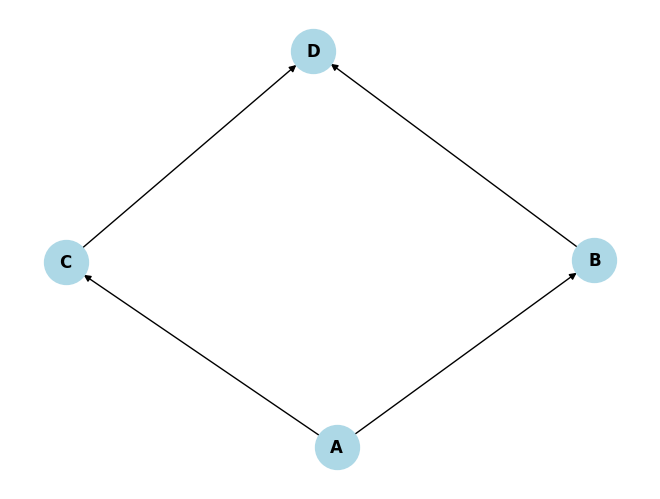

In [15]:
kite = DiGraph()
for node in 'ABCD':
    kite.add_node(node)
for edge in ('AB', 'AC', 'BD', 'CD'):
    kite.add_edge(edge[0], edge[1])
kite.draw()

There are two subgraphs starting from A, depending on whether D is
visited from B or from C, but the function produces only one of them.

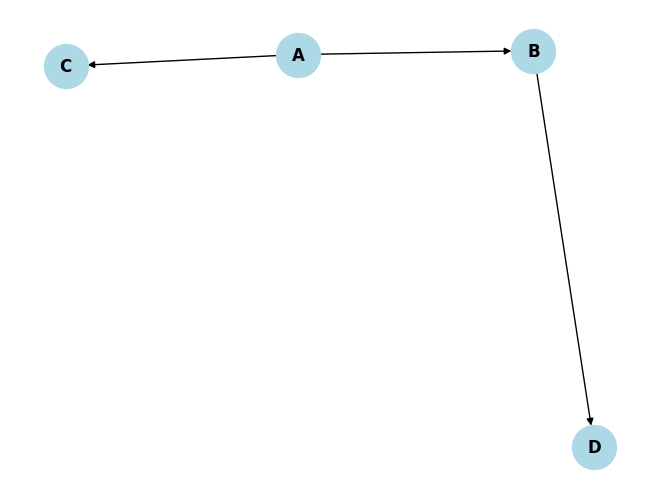

In [16]:
bfs(kite, 'A').draw()

If you run the last cell, you may get the other subgraph.
To understand why the same code can produce different outputs
at different times for the same input, remember that in Python
the hash value of a string changes in every interpreter session
(see the paragraph before [Section&nbsp;8.3.3](../08_Unordered/08_3_hash_table.ipynb#8.3.3-Unhashable-values))
and sets are implemented with hash tables.
So, the internal order of strings 'B' and 'C' in the set of A's neighbours
may change between sessions, leading to a different BFS subgraph.

⟵ [Previous section](17_7_traversal.ipynb) | [Up](17-introduction.ipynb) | [Next section](17_9_summary.ipynb) ⟶